In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

### Read lena.bmp

In [3]:
img = cv2.imread("lena.bmp")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (a) original image and its histogram

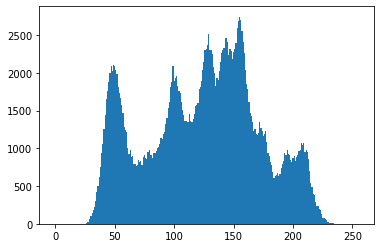

In [4]:
tmp = img.copy()
img_h, img_w = tmp.shape[:2]
x_axis = range(0,256)
y_axis = [0]*256

for i in range(img_h):
    for j in range(img_w):
        y_axis[tmp[i,j,0]] += 1

plt.bar(x_axis,y_axis, width=1)
plt.savefig("ori_histo.png")
plt.show()

## (b) image with intensity divided by 3 and its histogram

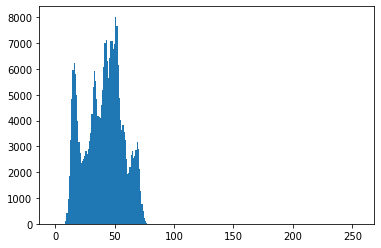

In [37]:
tmp = img.copy()/3
tmp = tmp.astype('int8')
img_h, img_w = tmp.shape[:2]
x_axis = range(0,256)
y_axis = [0]*256

for i in range(img_h):
    for j in range(img_w):
        y_axis[tmp[i,j,0]] += 1

plt.bar(x_axis,y_axis, width=1)
plt.savefig("divided_3_histo.png")
plt.show()

## (c) image after applying histogram equalization to (b) and its histogram

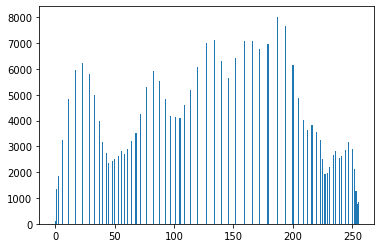

In [38]:
# Using last tmp which is img/3
tmp = img.copy()/3
tmp = tmp.astype('uint8')
pixels_total = img_h*img_w
pixels_sum = 0
cvt_tabel = [0]*256

for i in range(0, 256):
    pixels_sum += y_axis[i]
    cvt_tabel[i] = int(round(255*pixels_sum/pixels_total))
    
for i in range(img_h):
    for j in range(img_w):
        tmp[i][j][:] = cvt_tabel[tmp[i][j][0]]

y_axis = [0]*256
for i in range(img_h):
    for j in range(img_w):
        y_axis[tmp[i,j,0]] += 1
        
cv2.imwrite("Histo_equ.png", tmp)
plt.bar(x_axis,y_axis, width=1)
plt.savefig("equ_histo.png")
plt.show()

In [25]:
cvt_tabel[tmp[0][0][0]]

255

In [39]:
tmp[0][0][0]

205